# Exploratory Data Analysis of the Nuclei Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from helper_functions import display_images, convert_to_binary, convert_all_arrays_to_binary

## EDA

In [4]:
images1 = np.load('/Users/Neda/downloads/fold 1/images/fold1/images.npy')
images2 = np.load('/Users/Neda/downloads/fold 2/images/fold2/images.npy')
images3 = np.load('/Users/Neda/downloads/fold 3/images/fold3/images.npy')

masks1 = np.load('/Users/Neda/downloads/fold 1/masks/fold1/masks.npy')
masks2 = np.load('/Users/Neda/downloads/fold 2/masks/fold2/masks.npy')
masks3 = np.load('/Users/Neda/downloads/fold 3/masks/fold3/masks.npy')

In [5]:
types1 = np.load('/Users/Neda/downloads/fold 1/images/fold1/types.npy')
types2 = np.load('/Users/Neda/downloads/fold 2/images/fold2/types.npy')
types3 = np.load('/Users/Neda/downloads/fold 3/images/fold3/types.npy')

In [6]:
print(len(images1),len(images2),len(images3), len(images1)+len(images2)+len(images3))

2656 2523 2722 7901


In [7]:
print(images1.shape)
print(masks1.shape)
print(types1.shape)

(2656, 256, 256, 3)
(2656, 256, 256, 6)
(2656,)


In [8]:
converted_m1 = convert_all_arrays_to_binary(masks1)
converted_m2 = convert_all_arrays_to_binary(masks2)
converted_m3 = convert_all_arrays_to_binary(masks3)

In [11]:
train = np.load("/Users/Neda/train.npz")
val = np.load("/Users/Neda/val.npz")
test = np.load("/Users/Neda/test.npz")

images = np.concatenate((train['images'], val['images'], test['images']))
masks = np.concatenate((train['masks'], val['masks'], test['masks']))

converted_m1 = masks[:2656]
converted_m2 = masks[2656:5179]
converted_m3 = masks[5179:]

print(len(converted_m1), len(converted_m2), len(converted_m3))

2656 2523 2722


In [12]:
# number of images in each fold that do not have a positive pixel instance
negatives1 = [mask for mask in converted_m1 if 1 not in np.unique(mask)]
negatives2 = [mask for mask in converted_m2 if 1 not in np.unique(mask)]
negatives3 = [mask for mask in converted_m3 if 1 not in np.unique(mask)]
print(len(negatives1))
print(len(negatives2))
print(len(negatives3))

551
566
599


In [13]:
images = np.concatenate((images1, images2, images3))
masks = np.concatenate((converted_m1, converted_m2, converted_m3))
types = np.concatenate((types1, types2, types3))

In [14]:
print(images.shape)
print(masks.shape)
print(types.shape)

(7901, 256, 256, 3)
(7901, 256, 256)
(7901,)


In [15]:
# filter out images that have less than or equal to 100 positive pixel instances
ims = []
mks = []
typ = []

for i, m in enumerate(masks):
    if 1 in np.unique(m) and np.unique(m, return_counts=True)[1][1] > 100:
        ims.append(images[i])
        mks.append(m)
        typ.append(types[i])
        
images = np.array(ims)
masks = np.array(mks)
types = np.array(typ)

In [16]:
print(images.shape)
print(masks.shape)
print(types.shape)

(6097, 256, 256, 3)
(6097, 256, 256)
(6097,)


In [17]:
# save final dataset to compressed file
np.savez_compressed("data/nuclei_data.npz", images=images, masks=masks, types=types)

## Data Split

In [18]:
# run with saved data on subsequent runs
data = np.load("data/nuclei_data.npz")
images = data["images"]/1.0
masks = np.expand_dims(data["masks"], axis=-1)/1.0
types = data['types']
images, masks, types = shuffle(images, masks, types, random_state=12)

train_split = round(len(images) * 0.7)
val_split = round(len(images) * 0.2) + train_split

images_train = images[:train_split]
images_val = images[train_split:val_split]
images_test = images[val_split:]

masks_train = masks[:train_split]
masks_val = masks[train_split:val_split]
masks_test = masks[val_split:]

types_train = types[:train_split]
types_val = types[train_split:val_split]
types_test = types[val_split:]

In [19]:
print("Train masks:", masks_train.shape)
print("Validation masks:", masks_val.shape)
print("Test masks:", masks_test.shape)

Train masks: (4268, 256, 256, 1)
Validation masks: (1219, 256, 256, 1)
Test masks: (610, 256, 256, 1)


In [20]:
print("Total:")
print(np.unique(types, return_counts=True))
print()
print("Train:")
print(np.unique(types_train, return_counts=True))
print()
print("Val:")
print(np.unique(types_val, return_counts=True))
print()
print("Test:")
print(np.unique(types_test, return_counts=True))

Total:
(array(['Adrenal_gland', 'Bile-duct', 'Bladder', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'HeadNeck', 'Kidney', 'Liver', 'Lung',
       'Ovarian', 'Pancreatic', 'Prostate', 'Skin', 'Stomach', 'Testis',
       'Thyroid', 'Uterus'], dtype='<U13'), array([ 371,  344,   94, 1978,  237,  938,  289,  233,   99,  179,  178,
        129,  148,  130,  146,  120,  162,  160,  162]))

Train:
(array(['Adrenal_gland', 'Bile-duct', 'Bladder', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'HeadNeck', 'Kidney', 'Liver', 'Lung',
       'Ovarian', 'Pancreatic', 'Prostate', 'Skin', 'Stomach', 'Testis',
       'Thyroid', 'Uterus'], dtype='<U13'), array([ 260,  236,   70, 1385,  158,  648,  201,  162,   75,  123,  127,
         85,  111,   90,  108,   83,  114,  119,  113]))

Val:
(array(['Adrenal_gland', 'Bile-duct', 'Bladder', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'HeadNeck', 'Kidney', 'Liver', 'Lung',
       'Ovarian', 'Pancreatic', 'Prostate', 'Skin', 'Stomach', 'Testis',
 

## View Sample Images

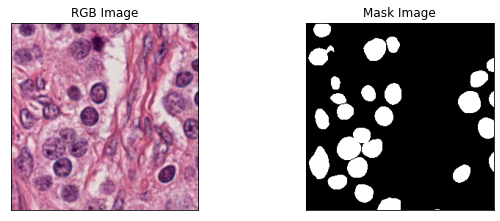

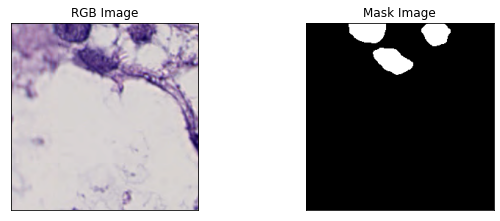

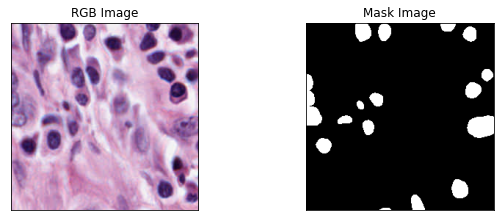

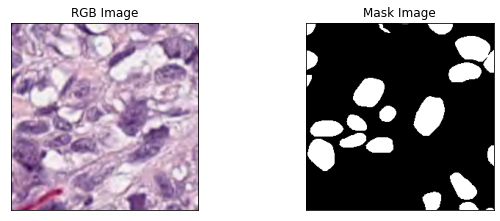

In [21]:
display_images(images_train[0], convert_to_binary(masks_train[0]))
display_images(images_train[1], convert_to_binary(masks_train[1]))
display_images(images_val[0], convert_to_binary(masks_val[0]))
display_images(images_val[1], convert_to_binary(masks_val[1]))